### The learning process alters model until it can make high-quality estimates. To determine how well a model is performing, the learning process uses mathematics in the form of a cost function also known an objective function.

# Error, cost and loss

### In supervised learning, error, cost and loss all refer to the number of mistakes that a model makes in predicting one or more labels. 

### Cost is calculated through mathematics, it isnt a qualitative judgement. e.g. If a model predicts a daily temp of 31 degrees and actual temperature is 28 degrees. Then we may say it has an error of 3 degrees.


# Minimizing cost is our goal

### We want to train the model to make no mistakes at all. That is often impossible, so instead we train model to have the lowest cost possible. 


# What is a cost function?

### In supervised learning, a cost function is a small piece of code that calculates cost from a model's prediction and the correct answer (expected label).

### After the cost function calculates the cost, we know whether a model is performing well or not. If its performing well, we might choose to stop training. If not, we can pass cost function to the optimizer, which uses this information to select new parameters for the model.

### During training, differnt cost functions can change how long training takes or how well it works.

In [3]:
import pandas as pd

from datetime import datetime

dataset = pd.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])

dataset['year'] = [(d.year + d.timetuple().tm_yday / 365.25) for d in dataset.date]

desired_dates = [
    datetime(1950,2,1),
    datetime(1960,2,1),
    datetime(1970,2,1),
    datetime(1980,2,1),
    datetime(1990,2,1),
    datetime(2000,2,1),
    datetime(2010,2,1),
    datetime(2017,2,1)
]

dataset = dataset[dataset.date.isin(desired_dates)].copy()

dataset

,date,amount_of_precipitation,max_temperature,min_temperature,rain,year
762,1950-02-01,0.00,27,1,False,1950.087611
4414,1960-02-01,0.15,52,44,True,1960.087611
8067,1970-02-01,0.00,50,42,False,1970.087611
11719,1980-02-01,0.37,54,36,True,1980.087611
15372,1990-02-01,0.08,45,37,True,1990.087611
19024,2000-02-01,1.34,49,41,True,2000.087611
22677,2010-02-01,0.08,49,40,True,2010.087611
25234,2017-02-01,0.00,43,29,False,2017.087611


In [6]:
# Comparing two cost functions
## SSD squares the difference and sum the result
## SAD converts differences into absolute differences and then sums them

import numpy as np

def sum_of_square_differences(estimate, actual):
    return np.sum((estimate - actual) ** 2)

def sum_of_absolute_differences(estimate, actual):
    return np.sum(np.abs(estimate - actual))



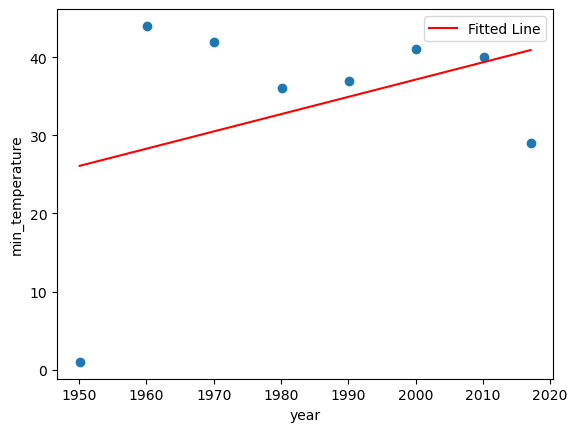

In [ ]:
from microsoft_custom_linear_regressor import MicrosoftCustomLinearRegressor
import matplotlib.pyplot as plt

model = MicrosoftCustomLinearRegressor().fit(X = dataset.year, y = dataset.min_temperature, cost_function= sum_of_square_differences)

plt.scatter(dataset['year'], dataset['min_temperature'])
plt.plot(dataset['year'], model.predict(dataset['year']), 'r', label = 'Fitted Line')

plt.xlabel('year')
plt.ylabel('min_temperature')

plt.legend()

### Here SSD did a poor job as line is fa from the values for many datapoints. Due to datapoint at the lower left, it is strongly influencing our final model.

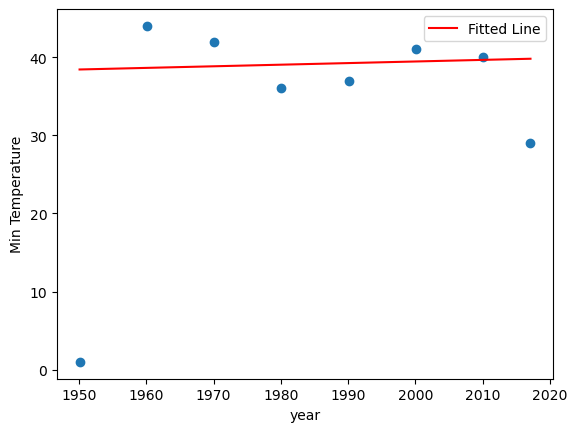

In [8]:
model = MicrosoftCustomLinearRegressor().fit(X= dataset.year, y = dataset.min_temperature, cost_function= sum_of_absolute_differences)

plt.scatter(dataset.year, dataset.min_temperature)
plt.plot(dataset.year, model.predict(dataset.year), 'r', label = 'Fitted Line')
plt.xlabel('year')
plt.ylabel('Min Temperature')
plt.legend()

### SAD worked really well in this scenario as fitted line passes through the majority of points much better than before. Since in farming scenario we are interested in average temperture change and we are not perticularly interested in datapoint of 1950. SAD works for us.

### So we learned how changing the cost function that is used during fitting can result in different final result. 